In [1]:
import pandas as pd
import os
import datetime
import numpy as np

In [4]:
#MIN MAXES

file_A = pd.read_excel("C:\\Users\\David.Wagura\\Desktop\\Automation Sandbox\\MIN MAX\\min max as at 26_02_2024.xlsx")
file_B = pd.read_excel("C:\\Users\\David.Wagura\\Desktop\\Automation Sandbox\\MIN MAX\\min max as at 04_03_2024.xlsx")
file_C = pd.read_excel("C:\\Users\\David.Wagura\\Desktop\\Automation Sandbox\\MIN MAX\\min max as at 11_03_2024.xlsx")
file_D = pd.read_excel("C:\\Users\\David.Wagura\\Desktop\\Automation Sandbox\\MIN MAX\\min max as at 18_03_2024.xlsx")


In [6]:
#INVETNORY
file_X = pd.read_excel("C:\\Users\\David.Wagura\\Desktop\\David\\SKU TOP80 SALES TREND AND REPORTS\\Inventory Status By Date\\01_03_2024.xlsx")
file_Y = pd.read_excel("C:\\Users\\David.Wagura\\Desktop\\David\\SKU TOP80 SALES TREND AND REPORTS\\Inventory Status By Date\\08_03_2024.xlsx")
file_Z = pd.read_excel("C:\\Users\\David.Wagura\\Desktop\\David\\SKU TOP80 SALES TREND AND REPORTS\\Inventory Status By Date\\15_03_2024.xlsx")
file_ZZ =pd.read_excel("C:\\Users\\David.Wagura\\Desktop\\David\\SKU TOP80 SALES TREND AND REPORTS\\Inventory Status By Date\\22_03_2024.xlsx")

In [8]:
active_item_list= pd.read_excel("C:\\Users\\David.Wagura\\Desktop\\Automation Sandbox\\Active Item List 27_03.xlsx")

In [9]:
active_item_list['Item No.'] = active_item_list['Item No.'].astype(str)

In [11]:
all_items=pd.read_excel("C:\\Users\\David.Wagura\\Desktop\\Automation Sandbox\\All Item Master Data.xlsx")

In [12]:
nw = all_items[['Item No.', 'Item Description', 'Existing Item Code']].copy()

In [13]:
nw['Old Codes']=nw['Existing Item Code'].astype(str).str.split('.', expand=True)[0]
nw.drop ('Existing Item Code', inplace=True, axis=1)

In [14]:
nw.rename(columns={'Item No.': 'New Item No.', 'Old Codes': 'Item No.'}, inplace=True)

In [15]:
nw2=nw[~nw.isin({'Item No.':['nan']})['Item No.']]

In [16]:
olditems_newitems_dict=dict (nw2[['Item No.', 'New Item No.']].values)

In [17]:
olditems_newitems_dict ['11606920003']

'159000395'

In [19]:
file_A['Item No.'] = file_A ['Item No.'].astype(str)
file_B['Item No.'] = file_B['Item No.'].astype(str)
file_C['Item No.'] = file_C ['Item No.'].astype(str)

In [20]:
file_X['Item No.'] = file_X ['Item No.'].astype(str)
file_Y['Item No.'] = file_Y['Item No.'].astype(str)
file_Z['Item No.'] = file_Z ['Item No.'].astype(str)

In [21]:
# file_A['Item No.']= file_A['Item No.'].apply(lambda x: olditems_newitems_dict[x] if x in olditems_newitems_dict else x)
# file_B['Item No.']= file_B['Item No.'].apply(lambda x: olditems_newitems_dict[x] if x in olditems_newitems_dict else x)
# file_C['Item No.']= file_C['Item No.'].apply(lambda x: olditems_newitems_dict[x] if x in olditems_newitems_dict else x)

In [22]:
# file_X['Item No.']= file_X['Item No.'].apply(lambda x: olditems_newitems_dict[x] if x in olditems_newitems_dict else x)
# file_Y['Item No.']= file_Y['Item No.'].apply(lambda x: olditems_newitems_dict[x] if x in olditems_newitems_dict else x)
# file_Z['Item No.']= file_Z['Item No.'].apply(lambda x: olditems_newitems_dict[x] if x in olditems_newitems_dict else x)

In [24]:
file_A ['Date'] =datetime.date(2024, 3, 1)
file_B ['Date'] =datetime.date(2024, 3, 8)
file_C ['Date'] =datetime.date(2024, 3, 15)
file_D ['Date'] =datetime.date(2024, 3, 22)

In [25]:
file_X ['Date'] =datetime.date(2024, 3, 1)
file_Y ['Date'] =datetime.date(2024, 3, 8)
file_Z ['Date'] =datetime.date(2024, 3, 15)
file_ZZ ['Date'] =datetime.date(2024, 3,22 )

In [26]:
min_maxes=pd.concat([file_A, file_B, file_C, file_D])

In [27]:
inventory= pd.concat([file_X, file_Y, file_Z, file_ZZ])

In [28]:
inventory['Item No.']=inventory['Item No.'].astype(str)
min_maxes['Item No.']=min_maxes['Item No.'].astype(str)

In [29]:
inventory.rename(columns={'Warehouse Name': 'Branches'}, inplace=True)

In [30]:
# inventory[inventory['Branches'] =='RETAIL SARIT'].sort_values(by='Date', ascending=False)

In [31]:
# sart=merged[merged['Branches']=='RETAIL SARIT'].sort_values(by='Date', ascending=False)


In [32]:
# merged[merged ['Item No.']=='162000175'].sort_values(by='Date', ascending =False)

In [33]:
merged = pd.merge(left=min_maxes, right = inventory [['Date', 'Item No.', 'Branches', 'Onhand/Availalble Qty']], how='left', on = ['Item No.', 'Branches', 'Date'])

In [34]:
merged[merged['selling_status'] == 'Top 30 Seller'].sort_values(by='Date', ascending =True).to_csv('Verfy.csv', index=False)

In [35]:
merged ['Item No.Date'] = merged ['Item No.'].astype(str) + merged ['Date'].astype(str)

In [36]:
retail_warehouse_inventory=inventory [inventory ['Branches'] == 'RETAIL WAREHOUSE'].copy()

In [37]:
retail_warehouse_inventory ['Item No.Date'] = retail_warehouse_inventory ['Item No.'].astype(str) + retail_warehouse_inventory['Date'].astype(str)

In [38]:
retail_warehouse_inventory.rename(columns = {'Onhand/Availalble Qty': 'Retail Warehouse Stock'}, inplace=True)

In [39]:
merged= pd.merge(left = merged, right = retail_warehouse_inventory [['Item No.Date','Retail Warehouse Stock']], on =['Item No.Date'], how='left')

In [40]:
merged.drop('Item No.Date', axis=1, inplace=True)

In [41]:
price_list_retail_price=active_item_list [['Item No.', 'Retail Price Inc VAT']].copy()

In [42]:
price_list_retail_price ['Item No.'] = price_list_retail_price ['Item No.'].astype(str)

In [43]:
merged['Item No.'] = merged ['Item No.'].astype(str)

In [44]:
merged_with_price=pd.merge(left=merged, right = price_list_retail_price, on = ['Item No.'])

In [45]:
merged_with_price.fillna({'Onhand/Availalble Qty': 0}, inplace=True)

In [46]:
item_brand=active_item_list[['Item No.', 'Brand']].drop_duplicates()

In [47]:
item_brand_dictionary=dict(item_brand.values)

In [48]:
brands=merged_with_price['Item No.'].apply(lambda x: item_brand_dictionary[x])

In [49]:
merged_with_price.insert(4, 'Brand', brands) 

In [51]:
merged_with_price.drop(['Main Order/Top Up Mean', 'MAX 1.5 Months'], axis=1,inplace=True)
merged_with_price.rename(columns={'Mean': 'MIN'}, inplace=True)
merged_with_price.insert(8, 'MAX', merged_with_price.MIN * 1.5)

In [52]:
merged_with_price

,Item No.,Item Description,Department,Branches,Brand,selling_status,Last Seen,MIN,MAX,Date,Onhand/Availalble Qty,Retail Warehouse Stock,Retail Price Inc VAT
0,153000137,SALAMA WHITE OATS(JMBO/SFST) 1KG,Packed Cereals,MAIN WAREHOUSE,SALAMA,Top 30 Seller,2.0,31356.000,47034.0000,2024-03-01,0.0,NaN,250.0
1,153000137,SALAMA WHITE OATS(JMBO/SFST) 1KG,Packed Cereals,MAIN WAREHOUSE,SALAMA,Top 30 Seller,1.0,34506.000,51759.0000,2024-03-08,0.0,NaN,250.0
2,153000137,SALAMA WHITE OATS(JMBO/SFST) 1KG,Packed Cereals,MAIN WAREHOUSE,SALAMA,Top 30 Seller,0.0,37656.000,56484.0000,2024-03-15,0.0,NaN,250.0
3,153000137,SALAMA WHITE OATS(JMBO/SFST) 1KG,Packed Cereals,MAIN WAREHOUSE,SALAMA,Top 30 Seller,0.0,37656.000,56484.0000,2024-03-22,4500.0,NaN,250.0
4,164000019,M/HARVEST CORNFLAKES 500G (VPBAG),M/harvest,MAIN WAREHOUSE,M/HARVEST CEREALS,Top 30 Seller,2.0,15677.875,23516.8125,2024-03-01,17578.0,NaN,399.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
561722,162000104,DOVES GF WHITE BREAD FLOUR BLEND 1KG #GFWB16,Bulk Foods,MAIN WAREHOUSE,DOVES FARM,Bottom Seller,18.0,-8.580,-12.8700,2024-03-22,0.0,NaN,990.0
561723,140000049,MALTESERS ORANGE CHOCOLATE BUNNY 29G #RT402248,Confectionery,MAIN WAREHOUSE,CONFECTIONERY,Bottom Seller,NaN,-9.000,-13.5000,2024-03-01,0.0,NaN,195.0
561724,140000049,MALTESERS ORANGE CHOCOLATE BUNNY 29G #RT402248,Confectionery,MAIN WAREHOUSE,CONFECTIONERY,Bottom Seller,NaN,-9.000,-13.5000,2024-03-08,0.0,NaN,195.0
561725,140000049,MALTESERS ORANGE CHOCOLATE BUNNY 29G #RT402248,Confectionery,MAIN WAREHOUSE,CONFECTIONERY,Bottom Seller,NaN,-9.000,-13.5000,2024-03-15,0.0,NaN,195.0


In [53]:
def stock_status(x):
    if x['Onhand/Availalble Qty']>x['MAX']:
        return 'Overstock'
    elif x['Onhand/Availalble Qty']<x['MIN']:
        return 'Understock'
    elif x['Onhand/Availalble Qty'] >=x['MIN'] and x['Onhand/Availalble Qty']<=x['MAX']:
        return 'Well Stocked'
    else:
        return 'No Status'

In [54]:
stock_status_column=merged_with_price.apply(stock_status, axis=1)

In [55]:
merged_with_price ['Stock_Status']=stock_status_column

In [56]:
final_table=merged_with_price [merged_with_price ['MIN']>0].copy()

In [57]:
# brr[brr ['Item No.'] == '13506060009'] [brr[brr ['Item No.'] == '13506060009'] ['Date'] == datetime.date(2023, 12, 1)]

In [58]:
final_table[final_table['Item No.']=='13506060009'].Date.unique()

array([], dtype=object)

In [59]:
final_table=final_table [~final_table.isin({'Department': ['Services', 'Samples']})['Department']]

In [60]:
final_table=final_table [~final_table.isin({'Branches': ['RETAIL ELDORET HIGHLANDS']})['Branches']]

In [61]:
final_table['Retail/Main'] = final_table.Branches.apply(lambda x: 'RETAIL' if 'RETAIL' in x else 'MAIN')

In [62]:
temp_col = final_table ['Retail Warehouse Stock']

In [63]:
final_table.drop('Retail Warehouse Stock', axis=1, inplace=True)

In [64]:
final_table ['Retail Warehouse Stock'] = temp_col

In [65]:
final_table.fillna({'Retail Warehouse Stock': 0}, inplace=True)

In [66]:
final_table ['Branches'].unique()

array(['MAIN WAREHOUSE', 'RETAIL LIKONI', 'RETAIL NANYUKI',
       'RETAIL GARDEN CITY', 'RETAIL IMAARA MALL', 'RETAIL MAIYAN MALL',
       'RETAIL THE HUB', 'RETAIL SARIT', 'RETAIL EASTLEIGH BRANCH',
       'RETAIL CAPITAL CENTRE', 'RETAIL HILTON', 'RETAIL NYALI',
       'RETAIL YAYA', 'RETAIL THIKA ROAD MALL', 'RETAIL NAKURU',
       'RETAIL REHANI', 'RETAIL JUNCTION', 'RETAIL VILLAGE MARKET',
       'RETAIL LAVINGTON', 'RETAIL NYALI CENTRE', 'RETAIL WESTGATE',
       'RETAIL TWO RIVERS', 'RETAIL GALLERIA', 'RETAIL KISUMU',
       'RETAIL RIVERSIDE SQUARE', 'RETAIL ELDORET', 'RETAIL KISUMU MEGA',
       'RETAIL WESTLANDS SQUARE', 'RETAIL THE PLACE 67',
       'RETAIL RHAPTA ROAD', 'RETAIL ABC', 'RETAIL NAIVASHA',
       'RETAIL T-MALL', 'CARREFOUR MEGA (EXPRESS)'], dtype=object)

### PLUGGING IN GIT

In [67]:
GIT=pd.read_excel("Z:\\Demand 2024\\GIT\\CombinedGIT2024.xlsx")

In [68]:
GIT ['Shipment Name'].unique()

array(['CPL 24-01', 'Euro 9-10', 'BOBS RED MILL', 'LA TOILETERIES 23.02',
       'UK SEA HW TOLILETERIES', 'NYC SEA 23.06', 'NYC SEA 24.01'],
      dtype=object)

In [69]:
GIT['Item No.']=GIT['Item No.'].fillna(0).astype(int).astype(str)

In [70]:
GIT ['Report_Date'] = datetime.date(2024, 3, 22)

In [72]:
GIT['Unique_Identifier'] = GIT ['Item No.'].astype(str)+GIT['Report_Date'].astype(str)

In [73]:
final_table['Unique_Identifier'] = final_table ['Item No.'].astype(str)+ final_table ['Date'].astype(str)

In [74]:
brr=pd.merge(left = final_table, right = GIT[[ 'Quantity', 'Unique_Identifier']] , how='left', on = 'Unique_Identifier')

In [76]:
brr.fillna({'Quantity': 0}, inplace=True)

In [77]:
brr.rename({'Quantity': 'GIT'}, axis=1, inplace=True)

In [78]:
brr['GIT'] = brr.apply(lambda x: x['MIN']-x['Onhand/Availalble Qty'] if x.GIT>0 else x.GIT, axis=1)

In [79]:
brr['GIT'] = brr['GIT'].apply(lambda x: 0 if x <0 else x)

In [80]:
brr['Onhand_With_GIT'] = brr['Onhand/Availalble Qty'] + brr['GIT']

In [81]:
def GIT_stock_status(x):
    if x['Onhand_With_GIT']>x['MAX']:
        return 'Overstock'
    elif x['Onhand_With_GIT']<x['MIN']:
        return 'Understock'
    elif x['Onhand_With_GIT'] >=x['MIN'] and x['Onhand_With_GIT']<=x['MAX']:
        return 'Well Stocked'
    else:
        return 'No Status'

In [82]:
brr['Stock_Status_With_GIT'] = brr.apply(GIT_stock_status, axis=1)

In [83]:
# brr.to_excel('ServiceLevelRaw_255_09_2023.xlsx', index=False)

In [84]:
# brr

In [85]:
# final_table.to_csv('ServiceLevelRaw_255_09_2023.csv', index=False)

## UPLOADING TO GSHEETS -- USING SERVICE ACCOUNT

In [96]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
from gspread_dataframe import get_as_dataframe, set_with_dataframe

In [97]:
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive",'https://www.googleapis.com/auth/spreadsheets']
creds = ServiceAccountCredentials.from_json_keyfile_name('hu-cloud-data-storage-e81319c069ef.json', scope)
client = gspread.authorize(creds)

In [98]:
zonal_leaders_copy="1qYSEBNhc31dISA_4sFoGCt9x2clRAPHRi9jO04XRIOY"

report_key = "1onK4y0-zUoDCHa_fR8QxBtdZr9VxJK4sZFh061ZrTl4"



In [99]:
spreadsheet = client.open_by_key(report_key)
worksheet = spreadsheet.get_worksheet(0)
# sheet_name = 'Service Level Report 25_09_2023 [WIP]'

In [101]:
worksheet.batch_clear(['A2:R'])

{'spreadsheetId': '1onK4y0-zUoDCHa_fR8QxBtdZr9VxJK4sZFh061ZrTl4',
 'clearedRanges': ['Raw!A2:R477889']}

In [102]:
# worksheet.update(range_name='A2:05', values=final_table[:5].to_json())

In [103]:
shikilia = brr ['Stock_Status_With_GIT']

In [104]:
brr.drop(['Unique_Identifier','GIT','Onhand_With_GIT', 'Stock_Status_With_GIT'], axis=1, inplace=True)

In [105]:
# final_table

mask_final_table = brr.groupby(['Item No.', 'Date']).cumcount() == 0

brr['Qty Per Status'] = brr['Retail Warehouse Stock'].where(mask_final_table)

In [106]:
brr ['Stock_Status_With_GIT'] = shikilia.copy()

In [107]:
brr['MinSales'] = brr['MIN']* brr['Retail Price Inc VAT'] 

In [108]:
brr[brr ['Stock_Status'] != brr['Stock_Status_With_GIT']]

,Item No.,Item Description,Department,Branches,Brand,selling_status,Last Seen,MIN,MAX,Date,Onhand/Availalble Qty,Retail Price Inc VAT,Stock_Status,Retail/Main,Retail Warehouse Stock,Qty Per Status,Stock_Status_With_GIT,MinSales
1351,144000164,VERONI ACTIVE ISOTONIC ORANGE DRINK 700ML#ZBYE16,Drinks & Beverages,MAIN WAREHOUSE,VERONI,Top 31-60 Seller,0.0,2287.0000,3430.50000,2024-03-22,1132.0,279.0,Understock,MAIN,36.0,36.0,Well Stocked,638073.0000
1359,144000164,VERONI ACTIVE ISOTONIC ORANGE DRINK 700ML#ZBYE16,Drinks & Beverages,RETAIL NYALI CENTRE,VERONI,Top 61-80 Seller,0.0,4.4000,6.60000,2024-03-22,2.0,279.0,Understock,RETAIL,36.0,NaN,Well Stocked,1227.6000
1361,144000164,VERONI ACTIVE ISOTONIC ORANGE DRINK 700ML#ZBYE16,Drinks & Beverages,RETAIL IMAARA MALL,VERONI,Bottom Seller,0.0,3.6000,5.40000,2024-03-22,2.0,279.0,Understock,RETAIL,36.0,NaN,Well Stocked,1004.4000
1381,144000164,VERONI ACTIVE ISOTONIC ORANGE DRINK 700ML#ZBYE16,Drinks & Beverages,RETAIL NANYUKI,VERONI,Bottom Seller,1.0,0.1875,0.28125,2024-03-22,0.0,279.0,Understock,RETAIL,36.0,NaN,Well Stocked,52.3125
1754,144000162,VERONI ACTIVE ISOTONIC LEMON DRINK 700ML#ZBYE15,Drinks & Beverages,RETAIL NYALI CENTRE,VERONI,Bottom Seller,0.0,4.4000,6.60000,2024-03-22,3.0,279.0,Understock,RETAIL,97.0,NaN,Well Stocked,1227.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466254,151001523,SOMERSET CASHMEE MUSK NOIR SOAP BAR 150G #5130...,Natural Cosmetics,RETAIL SARIT,SOMERSET,Bottom Seller,24.0,0.0150,0.02250,2024-03-22,0.0,899.0,Understock,RETAIL,0.0,NaN,Well Stocked,13.4850
466255,151001523,SOMERSET CASHMEE MUSK NOIR SOAP BAR 150G #5130...,Natural Cosmetics,RETAIL YAYA,SOMERSET,Bottom Seller,25.0,0.0050,0.00750,2024-03-22,0.0,899.0,Understock,RETAIL,0.0,NaN,Well Stocked,4.4950
466439,152000034,ECOVER WASH UP LIQUID ZERO SENSITIVE 1LTR#4004319,Natural Detergents,RETAIL YAYA,ECOVER,Bottom Seller,22.0,0.0075,0.01125,2024-03-22,0.0,799.0,Understock,RETAIL,0.0,0.0,Well Stocked,5.9925
466507,137000683,UN ANIMAL WHEY ISOLATE LOADED CHOCOLATE (4LBS)...,Body Building,RETAIL WESTGATE,UNIVERSAL NUTRITION,Top 61-80 Seller,23.0,0.0050,0.00750,2024-03-22,0.0,9999.0,Understock,RETAIL,0.0,0.0,Well Stocked,49.9950


In [109]:
# final_table.to_csv('sdf.csv', index=False)

In [110]:
set_with_dataframe(worksheet, brr)

In [111]:
brr.Date.unique()

array([datetime.date(2024, 3, 1), datetime.date(2024, 3, 8),
       datetime.date(2024, 3, 15), datetime.date(2024, 3, 22)],
      dtype=object)

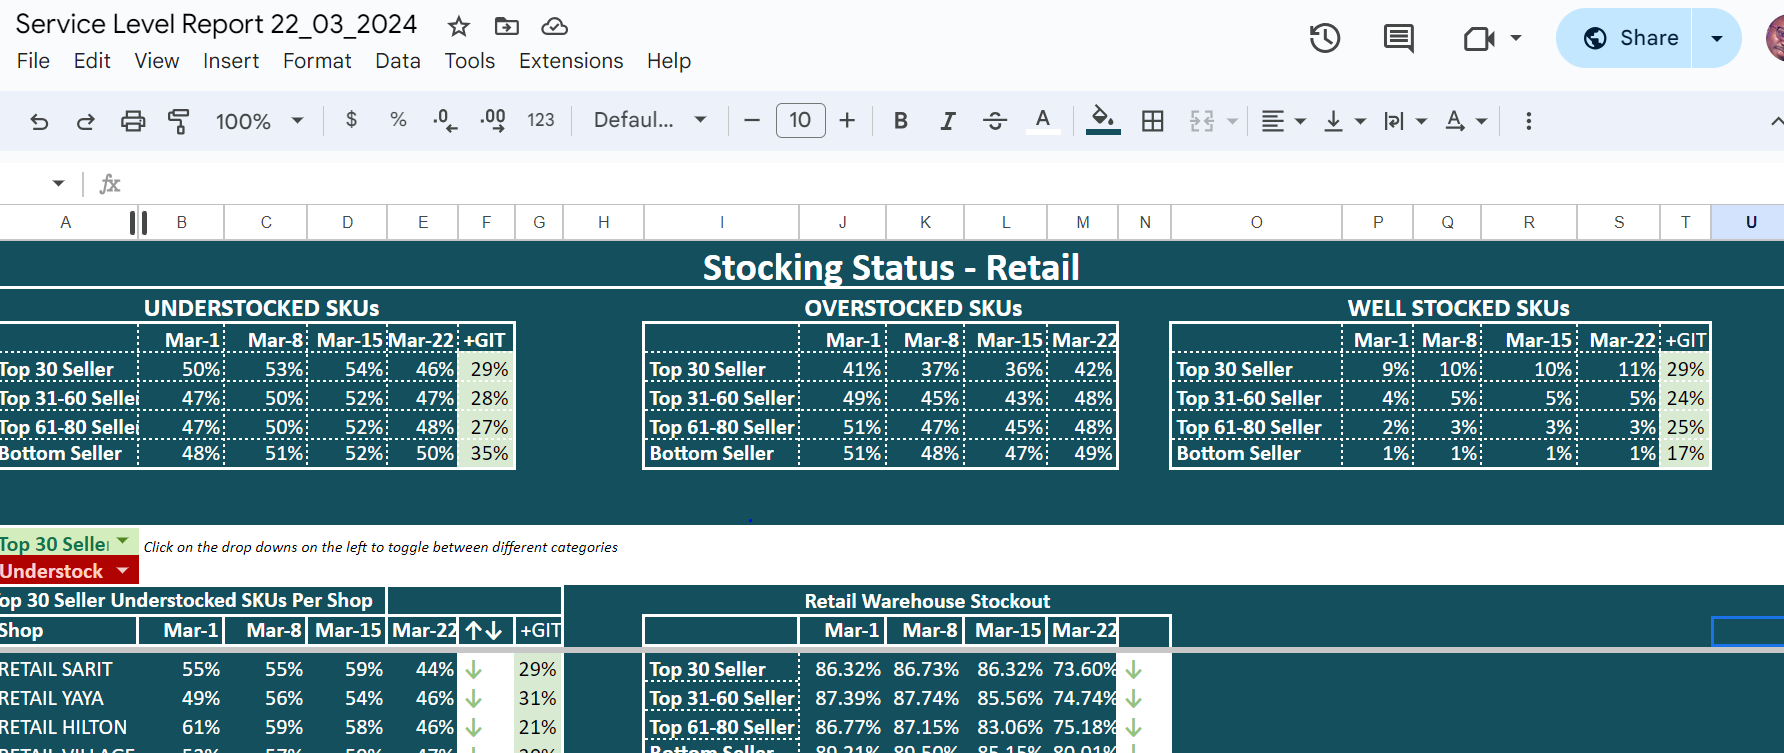

In [113]:
1+1

2